## EDA (탐색적 데이터 분석)
 
- 일별 주요 통계
- 변수별 특성
- 구간별 전환율 (Funnel Analysis)
- 클러스터링
- 클러스터별 전환율 차이 파악

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('songhunhwa.github.com\\tutorial\\tutorial_02\\df_funnel.csv', index_col = 0)

## 전처리

In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [40]:
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

In [41]:
df['ext'] = df['ext'].replace(ext_dic)

In [75]:
s = [] # empty list
j = 0 # default setting

# loop
for i in range(len(df)-1):
    
    # compare each rows
    if df.iloc[i]['sessionid'] == df.iloc[i+1]['sessionid']:
        s.append(j)

    # update j values
    else:
        s.append(j)
        j += 1

In [76]:
df['sessionid']  = pd.Series(['sess' + str(x) for x in s]) # convert to string as add character 's'

### 일별 트렌드
- 탐색 내용
    - 일별 로그 카운트
    - 일별 세션 카운트
    - 요일별 세션 카운트

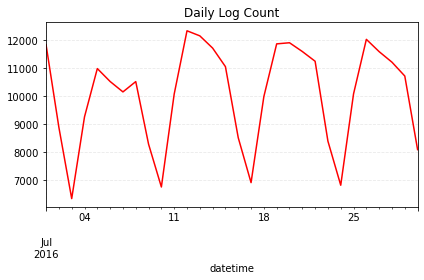

In [21]:
#daily log size
df.groupby('datetime').size().plot(c = 'r')

plt.title('Daily Log Count')
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle='--')
plt.tight_layout()

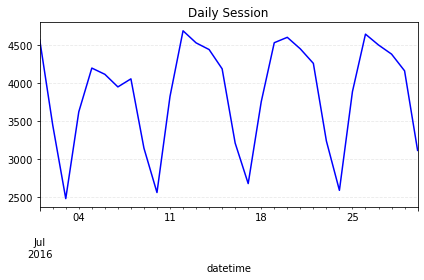

In [22]:
# daily session count => activness index

df.groupby('datetime')['sessionid'].nunique().plot(c = 'b')

plt.title('Daily Session')
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle='--')
plt.tight_layout()

## Note.
- 앱 사용에 seasonality 존재
- 로그수와 세션수의 트렌드가 유사

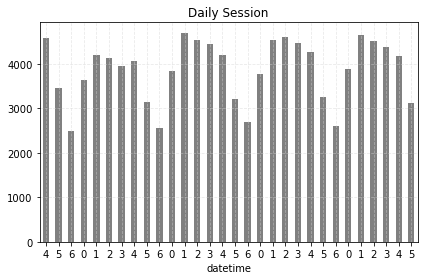

In [24]:
## daily session count (weekofday)
# 0: Monday, 6: Sunday

s = df.groupby('datetime')['sessionid'].nunique()
s.index = s.index.dayofweek

s.plot(color = 'grey', kind = 'bar', rot = 0)

plt.title("Daily Session")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

## Note
- 주말에 사용성이 매우 감소하고 주중 초반에 높은편
- 문서앱이라는 특성상 직장인 혹은 학생이 주로 사용할 것이라고 가정하면 당연한 결과이다

- 탐색내용
    - 일별, 확장지별 로그수
    - 일별, 위치별 로그수
    - 일별, 액션별 로그수
    - 일별, 화면 스크린별 유니크 유저수

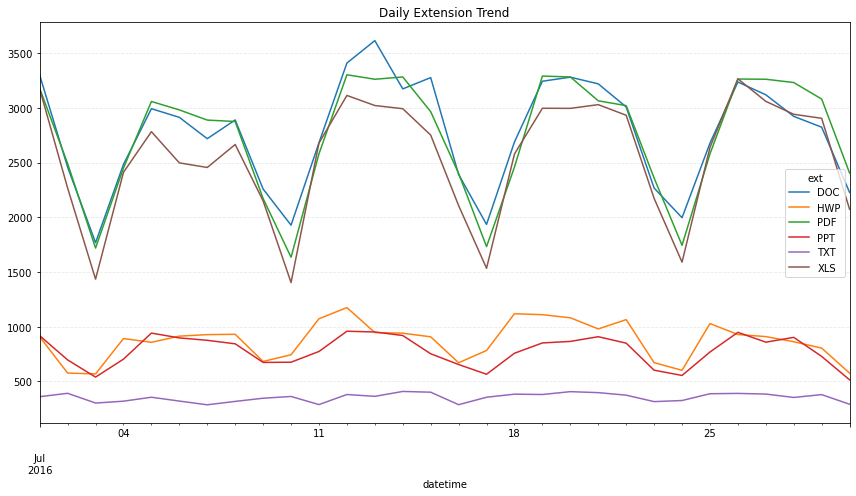

In [43]:
#daily trend by extension
df.groupby(['datetime', 'ext']).size().unstack().dropna(axis = 1).plot(figsize = (12, 7))

plt.title("Daily Extension Trend")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

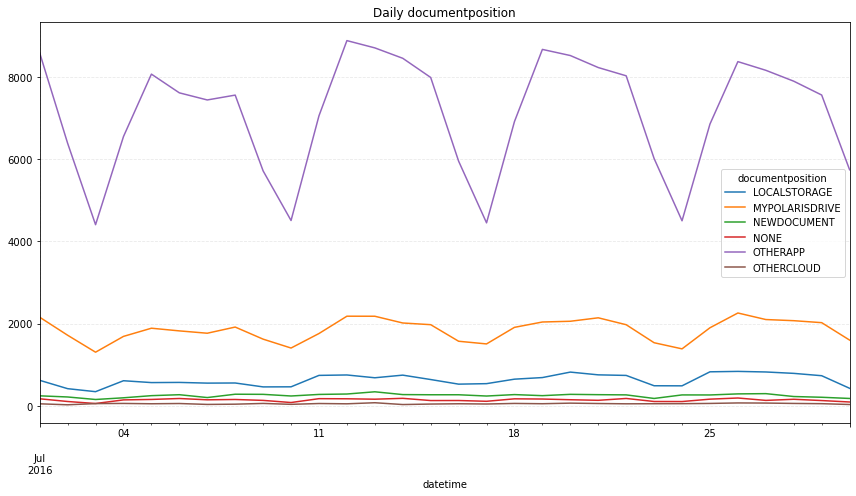

In [45]:
# daily trend by doc position
df.groupby(['datetime', 'documentposition']).size().unstack().dropna(axis = 1).plot(figsize = (12, 7))

plt.title("Daily documentposition")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

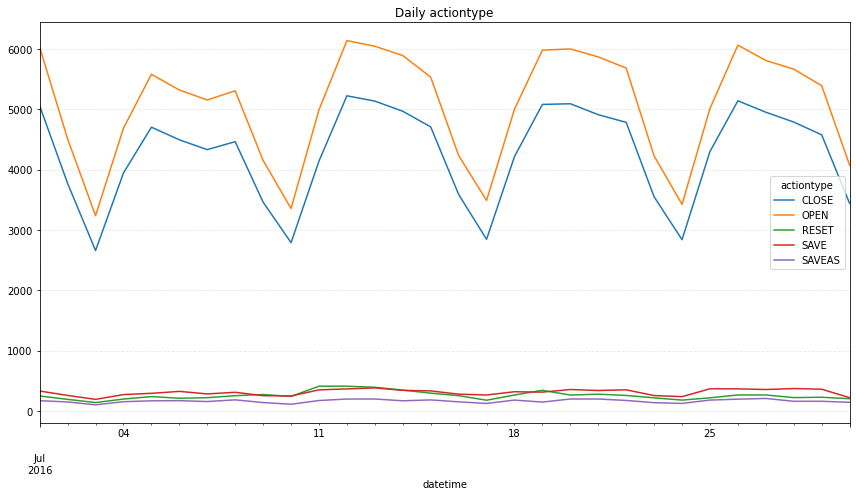

In [46]:
#daily trend by action type
df.groupby(['datetime', 'actiontype']).size().unstack().dropna(axis = 1).plot(figsize = (12, 7))

plt.title('Daily actiontype')
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

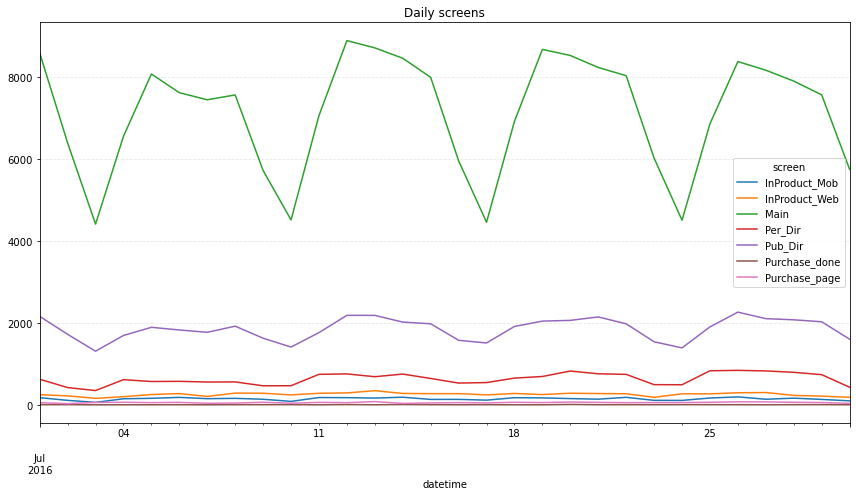

In [57]:
#daily trend by scree name
df.groupby(['datetime', 'screen']).size().unstack().fillna(0).astype(int).plot(figsize = (12, 7))

plt.title("Daily screens")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

In [61]:
#heat map
screens = df.groupby(['datetime', 'screen'])['sessionid'].nunique().unstack().fillna(0).astype(int)

#cols order change
screens = screens[screens.mean().sort_values(ascending = False).index]

screens.head()

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3582,1008,296,147,137,23,2
2016-07-02,2683,801,206,124,89,15,2
2016-07-03,1886,590,165,83,50,28,0
2016-07-04,2808,764,281,104,112,29,0
2016-07-05,3335,842,300,138,118,26,1


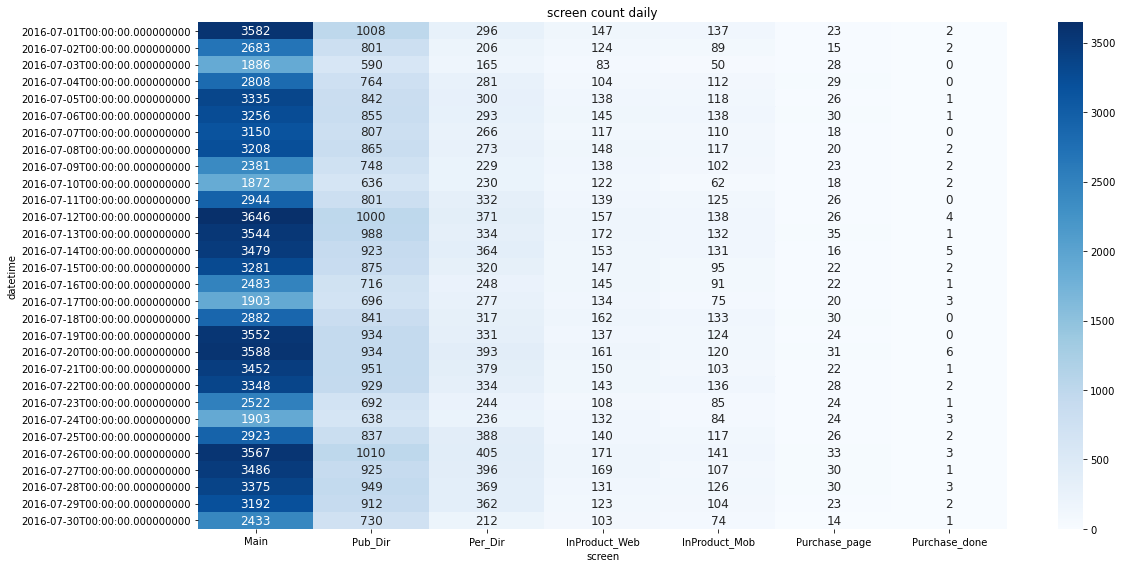

In [64]:
plt.subplots(figsize = (17, 8))

sns.heatmap(screens, annot = True, fmt = "d", annot_kws = {"size": 12}, cmap = "Blues")

plt.title('screen count daily')
plt.tight_layout()

### Note
- doc, pdf, xls 순으로 이용
- 주요 이용위치는 other app
- Main -> Purchase_done 까지 과정에서 대부분 이탈과정에서 대부분 이탈

### Pivoting을 통한 변수별 특성 탐색
- unstack, stack, pivot_table 과 같은 pandas 함수를 이용해, 다양한 각도에서 데이터 탐색

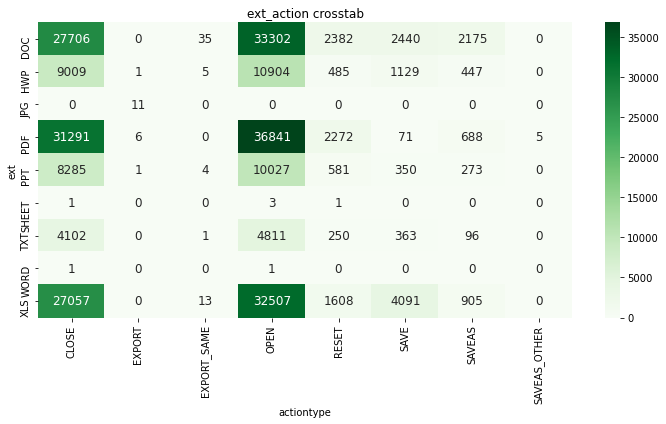

In [68]:
plt.subplots(figsize = (10, 6))

ext_action = df.groupby(['ext', 'actiontype'])['sessionid'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(ext_action, annot = True, fmt = 'd', annot_kws = {'size': 12}, cmap = 'Greens')

plt.title("ext_action crosstab")
plt.tight_layout()

In [69]:
#count to percent
df.groupby(['ext', 'actiontype'])['sessionid'].nunique().unstack().fillna(0).apply(lambda x: x/x.sum()*100).round(2)

actiontype,CLOSE,EXPORT,EXPORT_SAME,OPEN,RESET,SAVE,SAVEAS,SAVEAS_OTHER
ext,,,,,,,,
DOC,25.78,0.00,60.34,25.94,31.43,28.90,47.45,0.0
HWP,8.38,5.26,8.62,8.49,6.40,13.37,9.75,0.0
JPG,0.00,57.89,0.00,0.00,0.00,0.00,0.00,0.0
PDF,29.12,31.58,0.00,28.69,29.98,0.84,15.01,100.0
PPT,7.71,5.26,6.90,7.81,7.67,4.14,5.96,0.0
SHEET,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.0
TXT,3.82,0.00,1.72,3.75,3.30,4.30,2.09,0.0
WORD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
XLS,25.18,0.00,22.41,25.32,21.22,48.45,19.74,0.0


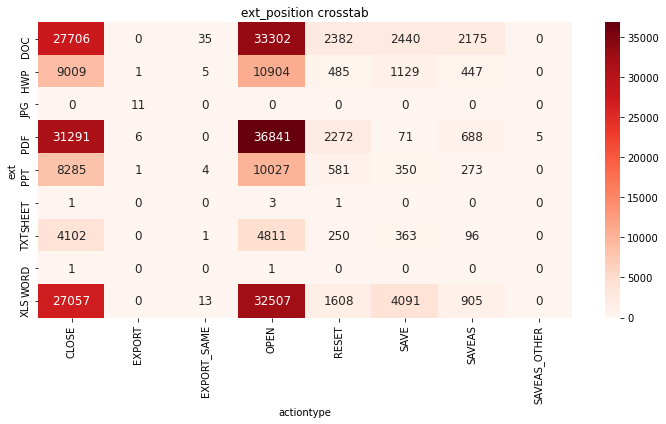

In [70]:
plt.subplots(figsize = (10,6))

ext_pos = df.groupby(['ext', 'actiontype'])['sessionid'].nunique().unstack().fillna(0).astype(int)

sns.heatmap(ext_pos, annot = True, fmt = 'd', annot_kws = {'size':12}, cmap = 'Reds')

plt.title("ext_position crosstab")

plt.tight_layout()

### 3.3 변수별 분포 및 상관관계

In [77]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
1,CLOSE,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
3,CLOSE,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main


In [78]:
ext_by_session = df.query("actiontype=='OPEN'").groupby(['sessionid', 'ext']).size().unstack().dropna(how = 'all')

ext_by_session.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
sess1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
sess10,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
sess100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
sess1000,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [79]:
pos_by_session = df.query("actiontype=='OPEN'").groupby(['sessionid', 'documentposition']).size().unstack().dropna(how = 'all')

pos_by_session.head()

documentposition,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,
sess0,1.0,1.0,NaN,NaN,NaN,NaN
sess1,NaN,NaN,NaN,1.0,NaN,NaN
sess10,NaN,1.0,NaN,1.0,NaN,NaN
sess100,NaN,NaN,NaN,1.0,NaN,NaN
sess1000,NaN,NaN,NaN,1.0,NaN,NaN


In [80]:
# Join => sessionid becomes unique (primary key)
exp_pos = pd.concat([ext_by_session, pos_by_session], axis = 1).fillna(0)

exp_pos.head()

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
sessionid,,,,,,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
exp_pos.describe().round(2)

,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,LOCALSTORAGE,MYPOLARISDRIVE,NEWDOCUMENT,OTHERAPP,OTHERCLOUD,SHAREDDOCUMENT
count,120657.00,120657.00,120657.00,120657.00,120657.0,120657.00,120657.0,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00,120657.00
mean,0.34,0.11,0.35,0.10,0.0,0.04,0.0,0.31,0.07,0.21,0.04,0.93,0.01,0.00
std,0.59,0.35,0.55,0.35,0.0,0.21,0.0,0.54,0.27,0.47,0.20,0.69,0.08,0.02
min,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,1.00,0.00,1.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.00,1.00,0.00,0.00
max,6.00,6.00,4.00,5.00,1.0,4.00,1.0,7.00,5.00,7.00,4.00,9.00,4.00,2.00


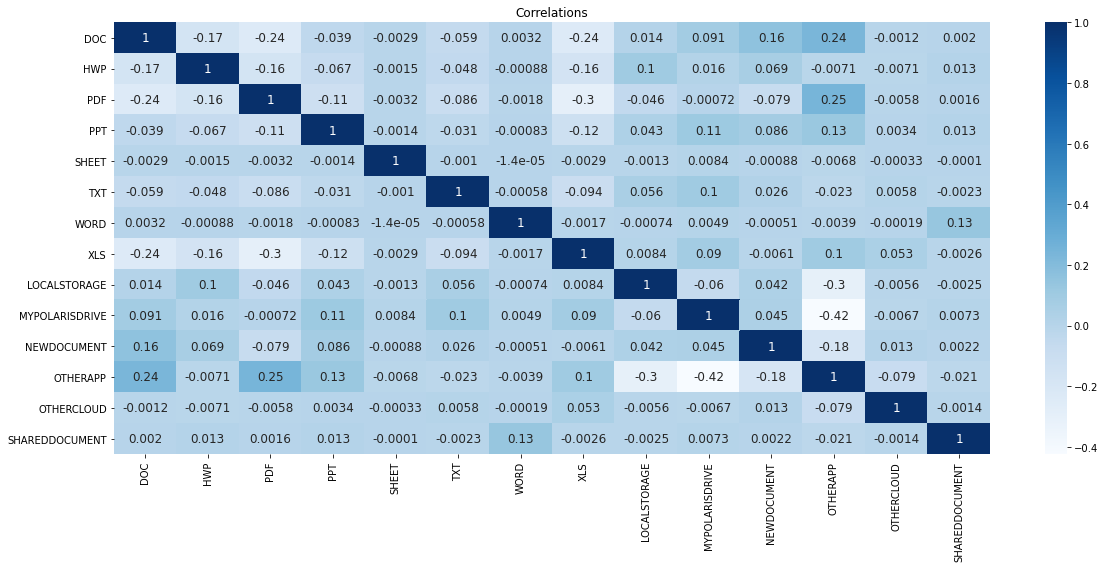

In [83]:
plt.subplots(figsize = (17, 8))

sns.heatmap(exp_pos.corr(), annot = True, annot_kws={'size':12}, cmap='Blues')

plt.title('Correlations')
plt.tight_layout()

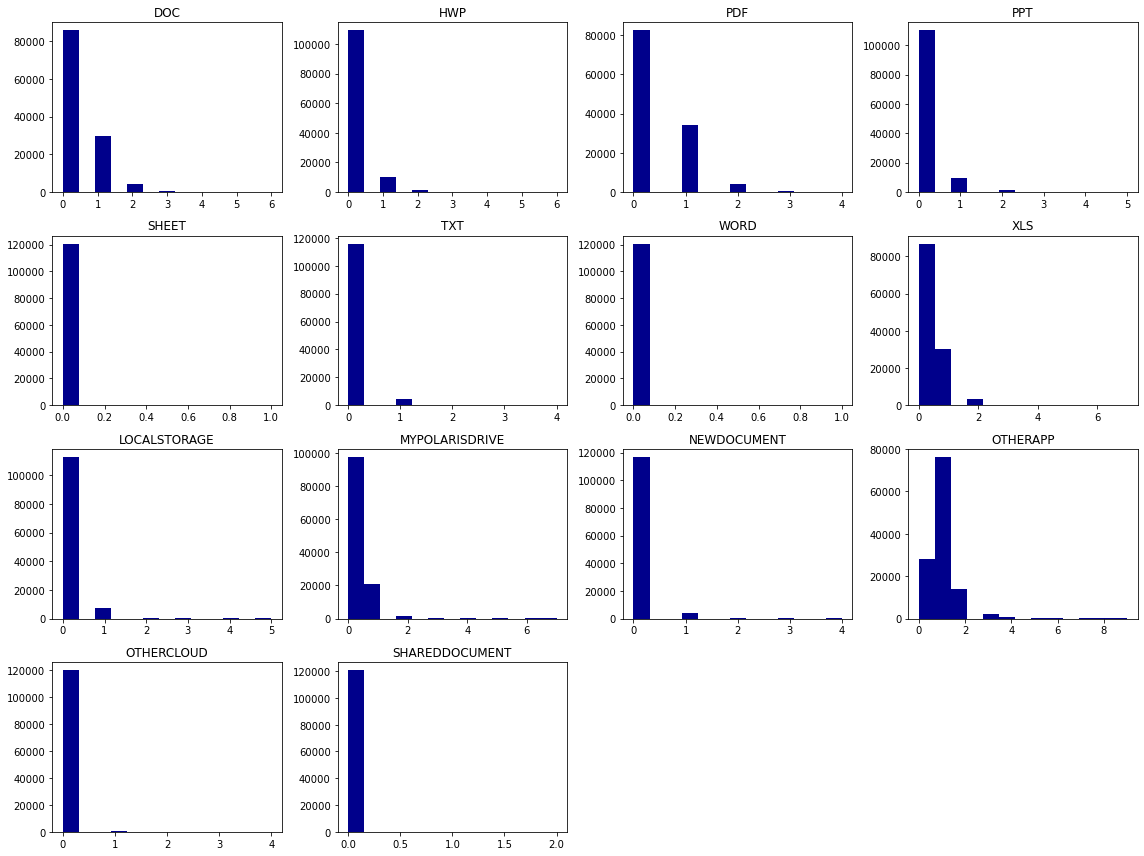

In [84]:
exp_pos.hist(bins = 13, color = 'darkblue', figsize = (16,12), grid = False)

plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

### 3.4 구간별 전환율 (Funnel) Daily Trend

In [87]:
screens.head()

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3582,1008,296,147,137,23,2
2016-07-02,2683,801,206,124,89,15,2
2016-07-03,1886,590,165,83,50,28,0
2016-07-04,2808,764,281,104,112,29,0
2016-07-05,3335,842,300,138,118,26,1


In [88]:
# mean of each columns
convert_cnt = screens.mean().apply(lambda x: int(x)).sort_values(ascending = False)

convert_cnt

screen
Main             2988
Pub_Dir           839
Per_Dir           305
InProduct_Web     138
InProduct_Mob     109
Purchase_page      24
Purchase_done       1
dtype: int64

In [90]:
# average conversion rate
for i in range(len(convert_cnt)-1):
    print((convert_cnt[i+1] / (convert_cnt[i]*1.0)*100).round(2))

28.08
36.35
45.25
78.99
22.02
4.17


In [91]:
# another option for gettig average conversion rate
convert_rt = [(convert_cnt[i+1] / (convert_cnt[i]*1.0) * 100).round(2) for i in range(len(convert_cnt)) if i < 6]

convert_rt

[28.08, 36.35, 45.25, 78.99, 22.02, 4.17]

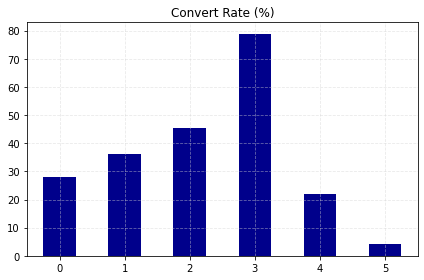

In [93]:
pd.Series(convert_rt).plot(kind = 'bar', color = 'darkblue', rot = 0)

plt.title("Convert Rate (%)")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

In [99]:
# create x labels
fun_label = [convert_cnt.index[k] + " > " + convert_cnt.index[k+1] for k,v in enumerate(convert_cnt.index) if k <6]

fun_label

['Main > Pub_Dir',
 'Pub_Dir > Per_Dir',
 'Per_Dir > InProduct_Web',
 'InProduct_Web > InProduct_Mob',
 'InProduct_Mob > Purchase_page',
 'Purchase_page > Purchase_done']

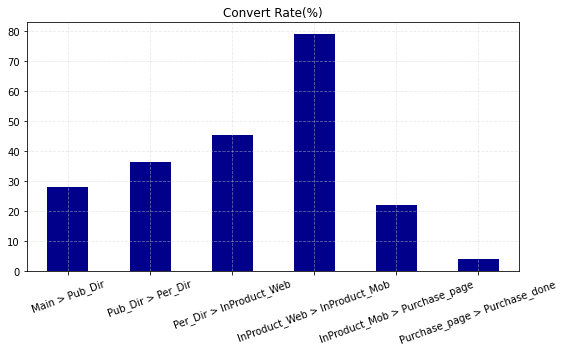

In [100]:
# with revised x labels
pd.Series(convert_rt, index = fun_label).plot(kind = 'bar', color = 'darkblue', rot = 20, figsize = (8,5), fontsize = 10)

plt.title("Convert Rate(%)")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

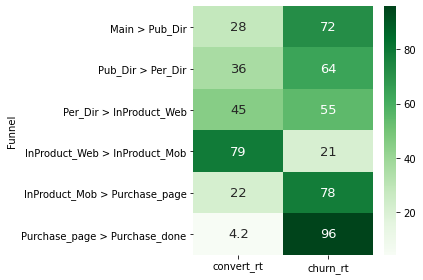

In [101]:
# another visualization
conv_rt_tb = pd.Series(convert_rt, index = fun_label).to_frame()
conv_rt_tb.index.name = 'Funnel'
conv_rt_tb.columns = ['convert_rt']
conv_rt_tb['churn_rt'] = 100 - conv_rt_tb['convert_rt']

sns.heatmap(conv_rt_tb, annot = True, annot_kws = {'size':13}, cmap = 'Greens')

plt.tight_layout()

## 중간정리
- 일별 주요 통계
    - 활성화 세션의 경우 주말에 감소하고 주중에 증가하는 추세를 보임
    - 확장자별 1tier에는 pdf, xls, doc가 포함되고, 2 tier에는 hwp, ppt가 포함된다
    - 문서의 이용 위치는 'other app' 압도적으로 높음
    - 스크린별 사용성 파악 결과, 메인 화면에 가장 많이 노출되며 다음화면으로 넘어가는 경우는 많지 않음
- 구간별 전환률
    - 전환율이 가장 낮은 구간(=이탈률이 가장 높은 구간)은 구매 정보페이지에서 구매 완료 페이지로 전환하는 구간임
    - 제품내 웹->앱으로 전환하는 구간은 전환율이 양호함

In [105]:
from sklearn.cluster import KMeans

In [102]:
# 확장자만 기준으로 group by sessionid 하여 클러스터링을 위한 전처리 진행
# Note. 만약 다른 변수가 같이 있다면 scaling 필수

df_ext = df.query("actiontype == 'OPEN'").groupby(['sessionid', 'ext']).size().unstack().fillna(0)

df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
sessionid,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [103]:
df_ext_elbow = df_ext.copy()

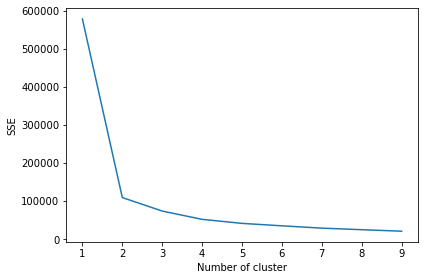

In [107]:
# screen plot with sum of square error
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(df_ext_elbow)
    df_ext_elbow['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

In [108]:
km = KMeans(n_clusters=4).fit(df_ext)

In [109]:
labels = km.labels_

labels

array([1, 1, 0, ..., 2, 3, 1])

In [110]:
df_ext['group'] = labels

In [111]:
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [112]:
df_ext['group'].value_counts()

1    37230
2    31752
3    30109
0    21566
Name: group, dtype: int64

In [113]:
df_ext_mean = df_ext.groupby("group").mean().round(2)

df_ext_mean

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS
group,,,,,,,,
0,0.00,0.57,0.01,0.39,0.0,0.19,0.0,0.00
1,0.08,0.01,1.12,0.03,0.0,0.01,0.0,0.05
2,1.19,0.00,0.02,0.06,0.0,0.02,0.0,0.07
3,0.01,0.01,0.01,0.02,0.0,0.01,0.0,1.13


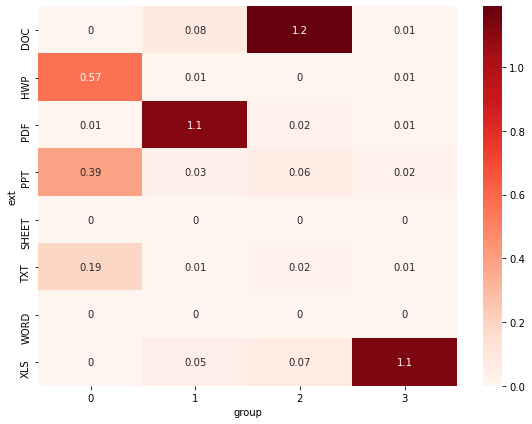

In [114]:
plt.subplots(figsize = (8, 6))

sns.heatmap(df_ext_mean.T, annot = True, cmap = 'Reds')

plt.tight_layout()

####  Note. 

- Labeling 주의 (실행시마다 바뀜)

In [116]:
# be careful with the values; the group no. changes randomly
group_name = {0: 'gr_hwp',
              1: 'gr_pdf',
              2: 'gr_doc',
              3: 'gr_xls'}

In [117]:
df_ext['group'].replace(group_name, inplace = True)

In [119]:
df_ext.head()

ext,DOC,HWP,PDF,PPT,SHEET,TXT,WORD,XLS,group
sessionid,,,,,,,,,
sess0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,gr_pdf
sess1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_pdf
sess10,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,gr_hwp
sess100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gr_xls
sess1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,gr_pdf


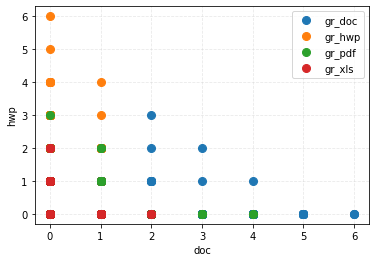

In [126]:
groups = df_ext.groupby('group')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['DOC'], group['HWP'], marker = 'o', linestyle = '', ms = 8, label = name)
    ax.legend()
    
plt.xlabel('doc')
plt.ylabel('hwp')
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.show()

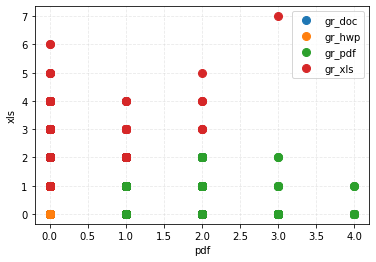

In [128]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['PDF'], group['XLS'], marker = 'o', linestyle = '', ms = 8, label = name)
    ax.legend()
    
plt.xlabel('pdf')
plt.ylabel('xls')
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.show()

In [130]:
df_open = df.query("actiontype == 'OPEN'")

df_open.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir
2,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir
4,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main
7,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main
8,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main


In [131]:
df_ext.group.head()

sessionid
sess0       gr_pdf
sess1       gr_pdf
sess10      gr_hwp
sess100     gr_xls
sess1000    gr_pdf
Name: group, dtype: object

In [132]:
df_cluster = df_open.merge(df_ext[['group']].reset_index(), on = 'sessionid', how = 'left')

df_cluster.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,group
0,OPEN,NoView,PDF,sess0,LOCALSTORAGE,2016-07-18,Per_Dir,gr_pdf
1,OPEN,View,PDF,sess0,MYPOLARISDRIVE,2016-07-18,Pub_Dir,gr_pdf
2,OPEN,NoView,PDF,sess1,OTHERAPP,2016-07-06,Main,gr_pdf
3,OPEN,NoView,PDF,sess2,OTHERAPP,2016-07-20,Main,gr_pdf
4,OPEN,NoView,PDF,sess3,OTHERAPP,2016-07-28,Main,gr_pdf


In [135]:
#define a function to get conversion rates
def conv_rt_by_grp(gr):
    df_gr_screen = df_cluster[df_cluster['group'] == gr]\
                    .groupby(['datetime', 'screen'])['sessionid']\
                    .nunique().unstack().fillna(0).astype(int)
    
    conver_cnt = df_gr_screen.mean().apply(lambda x: int(x)).sort_values(ascending = False)
    conver_rt = [conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100 for i in range(len(conver_cnt)) if i < 5]
    fun_label = [conver_cnt.index[k] + ">" + convert_cnt.index[k+1] for k, v in enumerate(convert_cnt.index) if k < 5]
    conver_rt = pd.Series(conver_rt, index = fun_label).fillna(0)
    
    return conver_rt

In [136]:
conv_rt_pdf = conv_rt_by_grp('gr_pdf')

conv_rt_pdf

Main>Pub_Dir                   16.066482
Pub_Dir>Per_Dir                29.310345
Per_Dir>InProduct_Web          13.725490
InProduct_Web>InProduct_Mob    42.857143
Purchase_page>Purchase_page     0.000000
dtype: float64

In [138]:
conv_rt_doc = conv_rt_by_grp('gr_doc')

conv_rt_doc

Main>Pub_Dir                   24.387255
Pub_Dir>Per_Dir                35.678392
InProduct_Web>InProduct_Web    87.323944
Per_Dir>InProduct_Mob           4.838710
Purchase_page>Purchase_page     0.000000
dtype: float64

In [139]:
conv_rt_xls = conv_rt_by_grp('gr_xls')
conv_rt_xls

Main>Pub_Dir                   34.135977
Pub_Dir>Per_Dir                27.385892
Per_Dir>InProduct_Web          30.303030
InProduct_Web>InProduct_Mob    55.000000
Purchase_page>Purchase_page     0.000000
dtype: float64

In [140]:
conv_rt_hwp = conv_rt_by_grp('gr_hwp')
conv_rt_hwp

Main>Pub_Dir                   31.958763
Pub_Dir>Per_Dir                55.483871
Per_Dir>InProduct_Web          37.209302
InProduct_Web>InProduct_Mob     6.250000
Purchase_page>Purchase_page     0.000000
dtype: float64

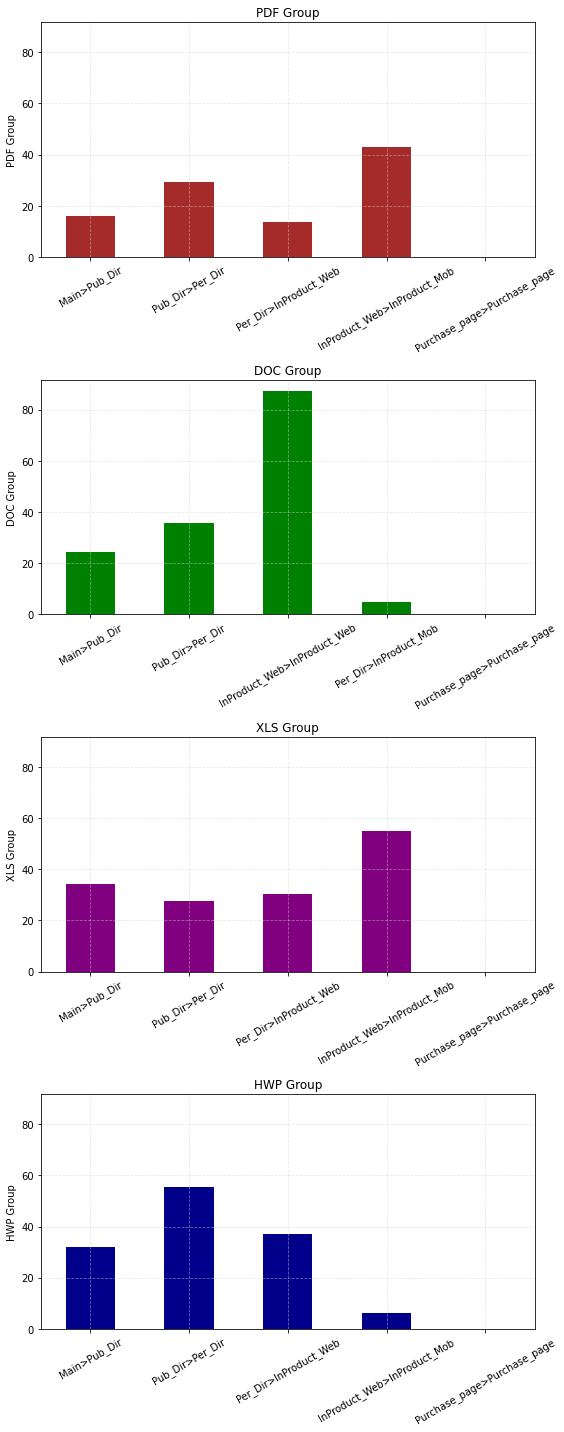

In [142]:
fig, ax = plt.subplots(4, 1, figsize = (8, 20), sharey = True)

conv_rt_pdf.plot(kind = 'bar', ax = ax[0], color = 'brown', rot = 30)
ax[0].set_title('PDF Group')
ax[0].set_ylabel('PDF Group')
ax[0].grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')

conv_rt_doc.plot(kind = 'bar', ax = ax[1], color = 'green', rot = 30)
ax[1].set_ylabel('DOC Group')
ax[1].set_title('DOC Group')
ax[1].grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')

conv_rt_xls.plot(kind='bar', ax=ax[2], color = 'purple', rot=30)
ax[2].set_ylabel('XLS Group')
ax[2].set_title('XLS Group')
ax[2].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_hwp.plot(kind='bar', ax=ax[3], color = 'darkblue', rot=30)
ax[3].set_ylabel('HWP Group')
ax[3].set_title('HWP Group')
ax[3].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

In [145]:
# 그룹별 평균 전환율
gr_pdf_avg = conv_rt_pdf.replace(0, np.nan).mean()
gr_doc_avg = conv_rt_doc.replace(0, np.nan).mean()
gr_xls_avg = conv_rt_xls.replace(0, np.nan).mean()
gr_hwp_avg = conv_rt_hwp.replace(0, np.nan).mean()

print("pdf", gr_pdf_avg)
print("doc", gr_doc_avg)
print("xls", gr_xls_avg)
print("hwp", gr_hwp_avg)

pdf 25.489864968816832
doc 38.05707505028774
xls 36.70622493908084
hwp 32.72548404498032


In [146]:
print(conv_rt_pdf)

Main>Pub_Dir                   16.066482
Pub_Dir>Per_Dir                29.310345
Per_Dir>InProduct_Web          13.725490
InProduct_Web>InProduct_Mob    42.857143
Purchase_page>Purchase_page     0.000000
dtype: float64


In [147]:
# 가중치 임의 설정
weights = [1, 1.3, 1.5, 2, 2.5]

# 가중 평균
def weight_avg(gr):
    w_avg = (gr.values * weights).sum() / len(gr)
    return w_avg 

In [148]:
gr_pdf_w = weight_avg(conv_rt_pdf)
gr_doc_w = weight_avg(conv_rt_doc)
gr_xls_w = weight_avg(conv_rt_xls)
gr_hwp_w = weight_avg(conv_rt_hwp)

print('pdf:', gr_pdf_w)
print('doc:', gr_doc_w)
print('xls:', gr_xls_w)
print('hwp:', gr_hwp_w)

pdf: 32.09449025574505
doc: 42.28649985949919
xls: 45.03843650853866
hwp: 34.48034972660691


In [149]:
avg_df = pd.DataFrame(list(zip([gr_pdf_avg, gr_doc_avg, gr_xls_avg, gr_hwp_avg],\
                                  [gr_pdf_w, gr_doc_w, gr_xls_w, gr_hwp_w])),\
                                  columns = ['mean', 'wg_mean'],\
                                  index = ['gr_pdf', 'gr_doc', 'gr_xls', 'gr_hwp'])

avg_df

,mean,wg_mean
gr_pdf,25.489865,32.094490
gr_doc,38.057075,42.286500
gr_xls,36.706225,45.038437
gr_hwp,32.725484,34.480350


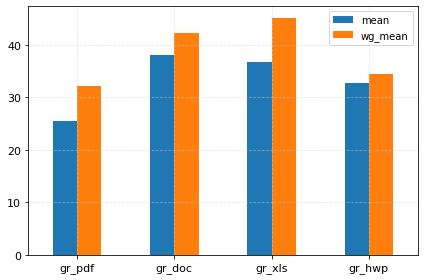

In [150]:
avg_df.plot(kind = 'bar', fontsize = 11, rot = 0)

plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()